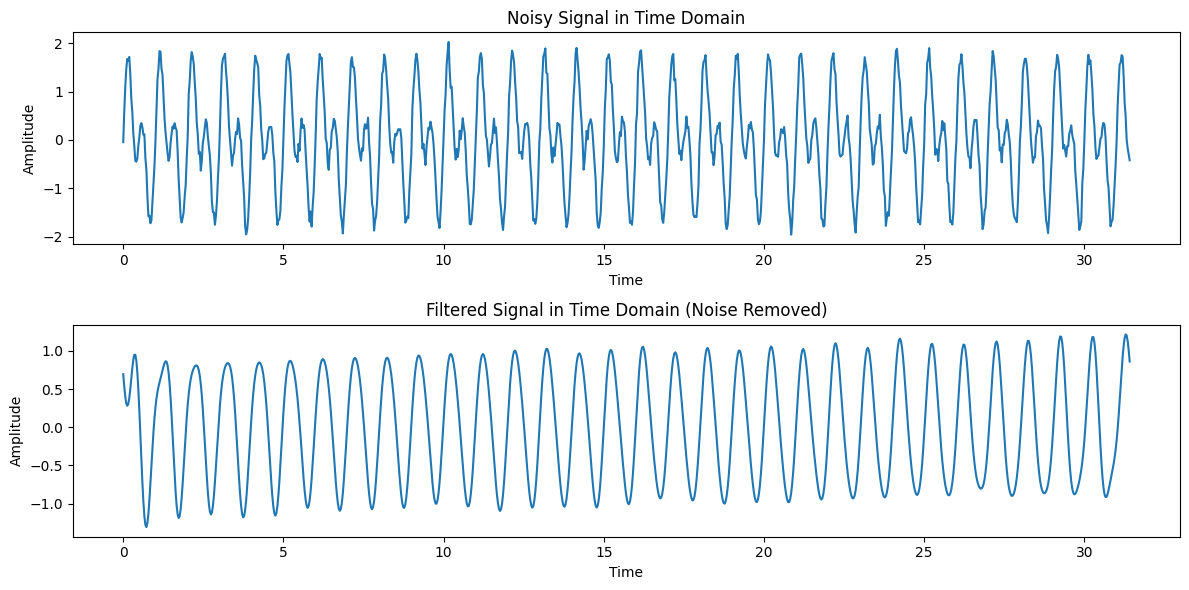

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# Step 1: Generate the time domain signal
t = np.linspace(0, 10 * np.pi, 1000)  # 1000 time points between 0 and 10*pi
signal = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)  # Two sine waves
noise = 0.1 * np.random.randn(len(t))  # Random noise
noisy_signal = signal + noise  # Signal with noise

# Plot the original noisy signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal in Time Domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Step 2: Perform the Fourier Transform (FFT)
N = len(noisy_signal)
sampling_interval = t[1] - t[0]
fft_result = fft(noisy_signal)  # Fourier Transform of the noisy signal
frequencies = fftfreq(N, sampling_interval)  # Frequencies corresponding to the FFT result

# Step 3: Filter out high-frequency noise
# Choose a cutoff frequency (e.g., 2 Hz)
cutoff_frequency = 2.0
fft_result_filtered = fft_result.copy()

# Set frequencies above the cutoff to zero (remove high-frequency noise)
fft_result_filtered[np.abs(frequencies) > cutoff_frequency] = 0

# Step 4: Perform the Inverse Fourier Transform (IFFT)
filtered_signal = ifft(fft_result_filtered).real  # Inverse FFT to return to time domain

# Plot the filtered signal
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal in Time Domain (Noise Removed)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Show the plots
plt.tight_layout()
plt.show()
